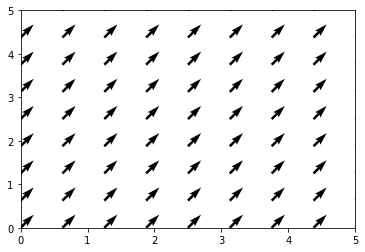

In [25]:
# CBF Tutorial
### Authors: Bardh Hoxha bardh.hoxha@toyota.com
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Tom Yamaguchi tomoya.yamaguchi@toyota.com
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Shakiba Yaghoubi tomoya.yamaguchi@toyota.com

### In this notebook, we present a short introduction on Control Barrier Functions.

First, let's start by defining a two-dimensional system, called **nimble_ant**, with the following dynamics: 

\begin{align*}
  \dot{x} &= \begin{bmatrix}x_0 \\  x_1\end{bmatrix}\\
\end{align*}

Given an initial position 
\begin{align*}
x^{init} = \begin{bmatrix} x^{init}_0 \\  x^{init}_1 \end{bmatrix}\\
\end{align*}
our goal is to control this system to a goal location $x^{goal}$. However, the system should avoid certain areas in the workspace (more on this later). 

One way to solve this problem is to pose it as an optimization problem. Specifically, we would like to solve the following problem:
\begin{align*}
\min_{u} \quad & ||u_{ref} - u||\\
\textrm{s.t.} \quad & \text{CBF constraints to be added later}\\
\end{align*}
So, we will try to minimize the distance between the decission variable $u$ and reference controller $u_ref$, while satisfying some constraints. For now, let us disregard the constraint and focus on designing a reference controller. 

## Reference controller

We will define a very simple reference controller as follows
\begin{align*}
u_{ref} = k \times (x^{goal} - x)
\end{align*}
This is a two dimensional vector that takes the difference between the current system state (or location) and the goal location and multiply it with a gain factor $k$. This **simple** reference controller will take us from an initial location to the goal location. Next, we need to make sure that the system does not enter undesired states. 

## Control Barrier Function (CBF) as Constraints

We assume that the undesired regions in the workspace can be defined with one or more ellipses. In two dimensions, the region inside an ellypsis can be using the standard form with the following inequality
\begin{align*}
\frac{z^2_0}{a^2} + \frac{z^2_1}{b^2}\leq 1
\end{align*}
where $z_0,z_1$ define the origin and $a,b$ define the major, minor axes of the ellipse, respectively. 

In our case, we would like to check whether our system is in the undesired region and therefore we modify the afforementined requirement 
\begin{align*}
B(x) = \frac{(x_0-z_0)^2}{a^2} + \frac{(x_1-z_1)^2}{b^2} - 1 
\end{align*}

CBFs are defined by the condition:
\begin{align*}
\dot{B}(x) \ge -\alpha(B(x))
\end{align*}

Where $\dot{B}(x) = \frac{\partial{B}}{\partial{t}}$ and $\alpha$ is a positive real value. $\dot{B}(x)$ indicates how this barrier changes with respect to time. 

In order to calculate $\dot{B}(x)$, we utilize the chain rule, which allows us to write
\begin{align*}
\dot{B}(x) = \frac{\partial{B}}{\partial{x}} \times \frac{\partial{x}}{\partial{t}}
\end{align*}

Since $\frac{\partial{x}}{\partial{t}} = \dot{x}$, then

\begin{align*}
\dot{B}(x) = \frac{\partial{B}}{\partial{x}} \times \frac{\partial{x}}{\partial{t}}
\end{align*}



Computing:	 -1.0 -1.0
Computing:	 -1.0 0.33333333333333326
Computing:	 -1.0 1.6666666666666665
Computing:	 -1.0 3.0
Computing:	 0.33333333333333326 -1.0
Computing:	 0.33333333333333326 0.33333333333333326
Computing:	 0.33333333333333326 1.6666666666666665
Computing:	 0.33333333333333326 3.0
Computing:	 1.6666666666666665 -1.0
Computing:	 1.6666666666666665 0.33333333333333326
Computing:	 1.6666666666666665 1.6666666666666665
Computing:	 1.6666666666666665 3.0
Computing:	 3.0 -1.0
Computing:	 3.0 0.33333333333333326
Computing:	 3.0 1.6666666666666665
Computing:	 3.0 3.0


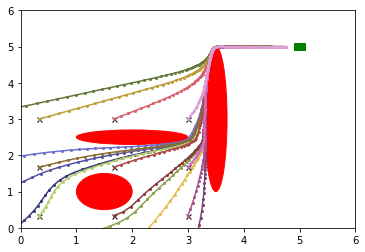

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

def f(x,t,u1,u2):
  return np.array([1, 1]) + np.array([u1,u2])

t = np.linspace(0, 1, 2)

# Grid of x, y points
nx, ny = 9, 9
x = np.linspace(0, 5, nx)
y = np.linspace(0, 5, ny)

plt.figure()

for i in x:
    for k in y:
        x_0 = np.array([i,k])
        xdot = spi.odeint(f, x_0, t,args=(0,0))
        vec = xdot[1,:] - xdot[0,:]
        plt.quiver(i,k,vec[0],vec[1])

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()        